# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [3]:
# your answer here
employee = pd.read_csv('employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [5]:
# your answer here-1st way
dpt = pd.pivot_table(employee, 
                    index = ['Department'],
                    values = ['Salary'],
                    aggfunc = {'Salary': 'mean'})
dpt.head()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [8]:
# your answer here-2nd way

#estrategia 1
dpt = employee.groupby(['Department'])['Salary'].mean()
dpt

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [16]:
# your answer here

#table = pd.pivot_table(employee, index = ['Department', 'Title'], aggfunc = {'Salary': 'mean'})
#table

table = pd.pivot_table(employee, index = ['Department', 'Title'], values = ['Salary'])
table

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [32]:
# your answer here

table2 = pd.pivot_table(employee, index = ['Department', 'Title'], columns = ['Years'], values = ['Salary'], fill_value = 0)
table2

Salary                    
Years                     1   2   3   4   7   8
Department Title                               
HR         VP             0   0   0   0   0  70
           analyst        0  30   0  35   0   0
IT         VP             0   0   0   0   0  70
           analyst       35  30   0   0   0   0
           associate      0   0   0   0  60   0
Sales      associate      0  55  55   0   0   0

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [54]:
# your answer here
table3 = pd.pivot_table(employee, 
                        index = ['Department', 'Title'],
                        #columns = ['Title'],
                        values = ['Salary'],
                        aggfunc = {'Salary':'mean', 'Title':'count'},
                        fill_value = 0,
                       )
table3
#'Name':{'Name':'value_count'}

Salary  Title
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [55]:
# your answer here
table4 = pd.pivot_table(employee, index = ['Department', 'Title'], aggfunc = {'Salary': {'Maxium': 'max', 'Minium':'min', 'Median':'median', 'Std':'std'}}).round(2)
table4
#In HR the diference between Analyst and VP is 2X

Salary                    
                     Maxium Median Minium   Std
Department Title                               
HR         VP          70.0   70.0   70.0   NaN
           analyst     35.0   32.5   30.0  3.54
IT         VP          70.0   70.0   70.0   NaN
           analyst     35.0   32.5   30.0  3.54
           associate   60.0   60.0   60.0   NaN
Sales      associate   55.0   55.0   55.0  0.00

#### Based on your comments, fill the missing values with an appropriate value

In [56]:
# your answer here
table4 = pd.pivot_table(employee, fill_value = 0, index = ['Department', 'Title'], aggfunc = {'Salary': {'Maxium': 'max', 'Minium':'min', 'Median':'median', 'Std':'std'}}).round(2)
table4

Salary                    
                     Maxium Median Minium   Std
Department Title                               
HR         VP            70   70.0     70  0.00
           analyst       35   32.5     30  3.54
IT         VP            70   70.0     70  0.00
           analyst       35   32.5     30  3.54
           associate     60   60.0     60  0.00
Sales      associate     55   55.0     55  0.00

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [57]:
# your answer here
table5 = pd.pivot_table(employee, 
                        index = ['Department', 'Title'],
                        #columns = ['Title'],
                        values = ['Salary'],
                        aggfunc = {'Salary':'sum', 'Title':'count'},
                        fill_value = 0,
                       )
table5

Salary  Title
Department Title                   
HR         VP             70      1
           analyst        65      2
IT         VP             70      1
           analyst        65      2
           associate      60      1
Sales      associate     110      2

#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [60]:
# your answer here
table6 = pd.pivot_table(employee, 
                        index = ['Department', 'Title'],
                        values = ['Salary', 'Years'],
                        aggfunc = {'Salary':'mean', 'Years':'sum'},
                        fill_value = 0,
                       )
table6

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
        

In [13]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [61]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [62]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [63]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [66]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

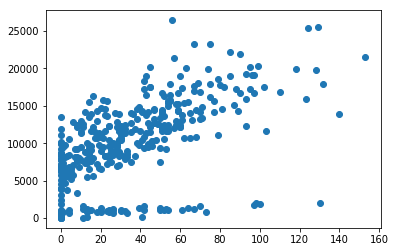

In [68]:
# your answer here
import matplotlib.pyplot as plt
x = fitbit['Minutes Very Active']
y = fitbit['Steps']
plt.scatter(x,y)

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here
#Se identifica una alta correlación de casi 0.6 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [69]:
# your answer here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990094

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

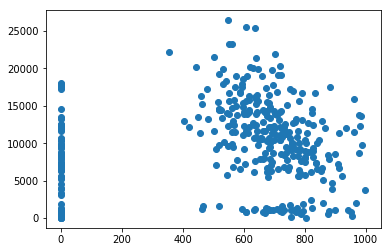

In [70]:
# your answer here
x = fitbit['Minutes Sedentary']
y = fitbit['Steps']
plt.scatter(x,y)

In [22]:
# Your comment here
#Se identifica una baja correlación de casi 0.07

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [72]:
# your answer here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836383

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

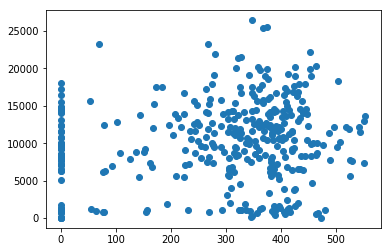

In [73]:
# your answer here
x = fitbit['MinutesOfSleep']
y = fitbit['Steps']
plt.scatter(x,y)

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [99]:
# your answer here
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit.corr()[column]

In [100]:
#Print cor_fit
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Distance,0.292790,0.779678,0.382940,0.160632,0.759310,0.129442
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Lightly Active,0.209540,0.393010,-0.085992,0.217021,-0.034425,0.105048
Minutes Fairly Active,0.188256,0.303244,0.278408,0.084137,0.337839,0.114950
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Activity Calories,-0.130758,-0.160568,-0.155532,-0.161446,-0.187309,-0.005804
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [114]:
# your answer here

cor_fit['Steps'].sort_values(ascending=False)

Steps                     1.000000
Distance                  0.779678
Minutes Very Active       0.571452
Minutes Lightly Active    0.393010
Floors                    0.306511
Minutes Fairly Active     0.303244
Calorie burned            0.255305
LengthOfRestInMinutes     0.133405
MinutesOfSleep            0.130986
MinutesOfBeingAwake       0.124846
NumberOfAwakings          0.106591
Minutes Sedentary         0.076906
Activity Calories        -0.160568
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [115]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [116]:
#Print time_grades
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001446E1A59B0>,
      dtype=object)

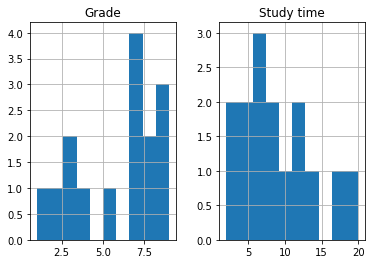

In [117]:
# your answer here
time_grades.hist()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [118]:
# your answer here-Pearson
time_grades.corr(method = 'pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [119]:
## your answer here-Spearman
time_grades.corr(method = 'spearman')
#the spearman method shows a higher correlation than pearson

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

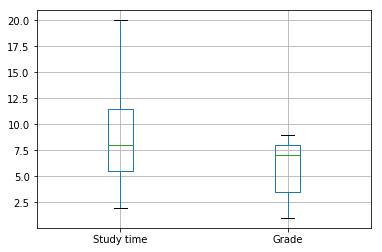

In [121]:
# your answer here
time_grades.boxplot()

In [34]:
#your comment here
#Existe un alto grado de correlación entre el tiempo estudiado y la nota obtenida

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here
#Pearson is more oriented to two continuous variables rather than ordinales variables as the Spearman